<h1>Python Statistics Fundamentals: How to Describe Your Data</h1>

<h2><b>1.Introduction</b></h2>
<p>In this notebook, I'll be taking notes from Real Python's lesson on the <b>fundamentals of statistics</b>. If you are interested, follow this <a href='https://realpython.com/python-statistics/'>link</a> to get the entire content. Thanks once again for the whole Real Python team - specially, in this case, <a href='https://realpython.com/team/mstojiljkovic/'>Mirko Stojiljković</a> for this course!</p>
<p>This notebook will cover the following <b>objectives</b>:</p>
<ul>
    <li>What numerical quantities you can use to describe and summarize your datasets</li>
    <li>How to calculate descriptive statistics in pure Python</li>
    <li>How to get descriptive statistics with available Python libraries</li>
    <li>How to visualize your datasets</li>
</ul>

<h2>

<h2><b>2.Understanding Descriptive Statistics</b></h2>
<p>The term <b>descriptive statistics</b> refers to the process of <b>describing</b> and <b>summarizing</b> data. It can use <b>two main approaches</b>:</p>
<ol>
    <li><b>Quantitative approach</b> - describes data numerically.</li>
    <li><b>Visual approach</b> - describes data with the assistance of data visualization tools (charts, histograms, plots, etc).</li>
</ol>
<p>When you describe a <b>single variable</b>, you're conducting a <b>univariate analysis</b>. When two variables are chosen to verify a statistical relationship, you are performing a <b>bivariate analysis</b>. Finally, <b>multivariate analysis</b> considers multiple variables.</p>


<h3><b>2.1 Types of Measures</b></h3>
<ol>
    <li><b>Central tendency</b> - describes the center of the data. Some of the measures include: <b>mean, mode, and median</b>.</li>
    <li><b>Variability</b> - describes the <b>spread</b> of the data. <b>Variance</b> and <b>standard deviation</b> represent useful measures.</li>
    <li><b>Correlation</b> or <b>joint variability</b> - tells you about the <b>relation</b> between a pair of variables in a dataset, in which <b>covariance</b> and the <b>correlation coefficient</b> are useful measures.</li>

<h3><b>2.2 Populations and Samples</b></h3>
<p>A <b>sample</b> constitutes a <b>subset of a population</b> and, ideally, should preserve the fundamental <b>features</b> of the population.</p>

<h3><b>2.3 Outliers</b></h3>
<p>An <b>outlier</b> is a data point that <b>significantly differs</b> from the majority of the data taken from a sample or a population. <b>Natural variation</b> in data, <b>change</b> in the behavior of the observed system, and <b>errors</b> during the process of data collection are some of the most frequent reasons for outliers, although you must always rely on <b>experience</b> to properly identify them.</p>

<h2><b>3. Python Statistics Libraries</b></h2>
<p>We'll be using the following libraries:</p>
<ul>
    <li><code>statistics</code></li>
    <li><code>NumPy</code></li>
    <li><code>SciPy</code></li>
    <li><code>Pandas</code></li>
    <li><code>Matplotlib</code></li>
</ul>
<hr>
<h2><b>4. Calculating Descriptive Statistics</b></h2>
<p>Let's import all the necessary packages:</p>

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats

<p>Let's now create some data:</p>

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0] # You can also use float('nan') and np.nan

In [3]:
x

[8.0, 1, 2.5, 4, 28.0]

In [4]:
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

<p>Let's now create <code>np.ndarray</code> and <code>pd.Series</code> objects corresponding  to <code>x</code> and <code>x_with_nan</code>:</p>

In [5]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

In [6]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [7]:
y_with_nan

array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ])

In [8]:
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [9]:
z_with_nan

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

<h3><b>4.1 Measures of Central Tendency</b></h3>
<h4><b>4.1.1 Mean</b></h4>
<p>It is expressed as <b>Σᵢ𝑥ᵢ/𝑛,</b>, that is, the <b>sum</b> of all elements <b>𝑥ᵢ</b> divided by the <b>number of items in the dataset</b>.</p>
<p>In pure Python, you can apply the following methods:</p>

In [10]:
mean_ = sum(x) / len(x)
mean_

8.7

<p>You can also use Python's built-in <code>statistics</code> functions:

In [11]:
mean_ = statistics.mean(x)
mean_

8.7

In [12]:
mean_ = statistics.fmean(x)
mean_

8.7

Although both <code>mean()</code> and <code>fmean()</code> produce the same result, the latter was later on introduced as a faster alternative, always returning a <b>floating-point</b> number. Keep in mind, however, that if there are <code>nan</code> values among your data, these functions will also return a <code>nan</code> value.

In [13]:
mean_ = statistics.mean(x_with_nan)
mean_

nan

In [14]:
mean_ = statistics.fmean(x_with_nan)
mean_

nan

You can also use Numpy to get the mean with <code>np.mean()</code>:

In [15]:
mean_ = np.mean(x)
mean_

8.7

NumPy's <code>mean()</code> function and the <code>mean</code> method deliver the same output, even when considering <code>nan</code> values. 

In [16]:
np.mean(y_with_nan)

nan

In [17]:
y_with_nan.mean()

nan

You can ignore these <code>nan</code> values with <code>np.nanmean()</code>:

In [18]:
np.nanmean(y_with_nan)

8.7

Finally, <code>pd.Series</code> also have the method <code>.mean()</code>:

In [19]:
mean_ = z.mean()
mean_

8.7

Pandas' <code>mean()</code> function, however, automatically <b>ignore</b> <code>nan</code> values:

In [20]:
z_with_nan.mean()

8.7

To change this behavior, you need to modify the optional parameter <code>skipna</code>:

In [21]:
z_with_nan.mean(skipna=False)

nan

<h4><b>4.1.2 Weighted Mean</b></h4>
<p>Also known as the <b>weighted average</b>, it is a generalization of the arithmetic mean, and allow you to define the relative contribution of each observation of the dataset to the result.</p>
<p>For each data point <i>x<sub>i</sub></i> of the dataset <i>x</i>, where <i>i</i>=1,2,...,<i>n</i> and <i>n</i> is the number of items in <i>x</i>. Then, you multiply each observation with its corresponding weight, sum all the products, and then divide the resulting sum with the sum of weights <i>&Sigma;<sub>i</sub>(w<sub>i</sub>x<sub>i</sub>)/&Sigma;<sub>i</sub>w<sub>i</sub></i>.</p>
<p>The weighted mean is a useful feature when dealing with a dataset that contains items that occur with given relative frequencies.</p>
<p><b>Example</b>: set in which 20% of all items are equal to 2, 50% of the items are equal to 4, and the remaining 30%, to 8. We can calculate the weighted average as following:


In [22]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

<p>Taking into consideration the relative frequency of the observations, there is no need to know the total number of items in advance.</p>
<p>Using pure Python, you can get the same result using <code>sum()</code> with either <code>range()</code> or <code>zip()</code>:</p>

In [23]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

6.95

In [24]:
wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
wmean

6.95

<p>When dealing with larger datasets, <code>np.average()</code> is the better choice either for NumPy arrays or Pandas Series.

In [25]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
wmean

6.95

In [26]:
wmean = np.average(z, weights=w)
wmean

6.95

<p>You can also use <code>w * y</code> with <code>np.sum()</code> or <code>.sum()</code>:</p>

In [27]:
(w * y).sum() / w.sum()

6.95

You must be careful, however, if your dataset contains <code>nan</code> observations:

In [28]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

nan

In [29]:
np.average(y_with_nan, weights=w)

nan

In [30]:
np.average(z_with_nan, weights=w)

nan

<h4><b>4.1.3 Harmonic Mean</b></h4>
<p> The <b>harmonic mean</b> is the reciprocal of the mean of all items in the dataset: <i>n / </i>&Sigma;<sub>i</sub>(1/<i>x</i><sub>i</sub>), where <i>i</i>=1,2,... <i>n</i> and <i>n</i> is the number of observations in the dataset <i>x</i>.

In [31]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

<p>You can achieve the same result with <code>statistics.harmonic_mean()</code>:</p>

In [32]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

<p>A dataset containing a <code>nan</code>, a 0, or  a negative number will produce different results:</p>

In [33]:
statistics.harmonic_mean(x_with_nan)

nan

In [34]:
statistics.harmonic_mean([1,0,2])

0

In [35]:
# Will raise a StatisticsError
# statistics.harmonic_mean([1, 2, -2])

<p>You can also use <code>scipy.stats.hmean()</code>:

In [36]:
scipy.stats.hmean(y)

2.7613412228796843

In [37]:
scipy.stats.hmean(z)

2.7613412228796843

<h4><b>4.1.4 Geometric Mean</b></h4>
<p>The <b>geometric mean</b> is represented by the <i>n</i>-th root of the product of all <i>n</i> elements <i>x</i><sub>i</sub> in a dataset <i>x</i>: <sup>n</sup>&radic;(&pi;<sub>i</sub><i>x</i><sub>i</sub>), in which <i>i</i> = 1,2,...,<i>i</i>.</p>
<p>In pure Python, such mean can be implemented as it follows:</p>

In [38]:
gmean = 1
for item in x:
        gmean *= item
        
gmean **= 1 / len(x)
gmean

4.677885674856041

<p>You can also use <code>statistics.geometric_mean()</code> to return the same result.</p>

In [39]:
gmean = statistics.geometric_mean(x)
gmean

4.67788567485604

<p>As in previous cases, passing data with <code>nan</code> values will return <code>nan</code>.

In [40]:
gmean = statistics.geometric_mean(x_with_nan)
gmean

nan

<p>You can also get the geometric mean with <code>scipy.stats.gmean()</code>:

In [41]:
scipy.stats.gmean(y)

4.67788567485604

In [42]:
scipy.stats.gmean(z)

4.67788567485604

<h4><b>4.1.5 Median</b></h4>
<p>The <b>sample median</b> represents the <b>middle element</b> of a sorted dataset. If the number of elements <i>n</i> of the dataset is <b>odd</b>, then the median is the value at the <b>middle position</b>: 0.5(<i>n</i> + 1). If <i>n</i> is <b>even</b>, then the median is the <b>arithmetic mean of the two values in the middle</b> - the items at the positions 0.5<i>n</i> and 0.5<i>n</i> + 1.</p>
<p>The main difference between the mean and the median is related to <b>outliers/extremes</b>. While the former is heavily affected by outliers, the latter <b>is not</b>. By moving the value of the observation at the rightmost point we can see the effects:</p>
<ul>
    <li><b>If you increase the value (move it to the right)</b>, the mean will rise, but the <b>median</b> won't change.</li>
    <li><b>If you decrease its value (move it to the left)</b>, the mean will drop, but the <b>median will remain the same</b> until the value of the point is <b>greater than or equal to 4</b>.
</ul>
<p>Comparing the mean and the median is a good way to detect outliers and skewness in your data.</p>
<p>Let's see how we can get the median using pure Python:</p>

In [43]:
x

[8.0, 1, 2.5, 4, 28.0]

In [44]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
    
median_

4

<p> The two most relevant steps here are:</p>
<ol>
    <li>1. <b>Sorting</b> the elements</li>
    <li>2. Finding the <b>middle element(s)</b></li>
</ol>
<p>You can also find the medium using <code>statistics.median()</code>:</p>

In [45]:
median_ = statistics.median(x)
median_

4

In [46]:
median_ = statistics.median(x[:-1])
median_

3.25

<p>In the last example, <code>x[:-1]</code> represents the original dataset without the last item, that is, <code>28.0</code>. Since the dataset now is <code>[1, 2.5, 4, 8.0]</code> and now we have two middle elements, <code>2.5</code> and <code>4</code>, their average is <code>3.25</code>.</p>
<p><code>median_low()</code> and <code>median_high()</code> are also related to the median in the <code>statistics</code> library. They will return an element from the dataset:
<ul>
    <li>If the number of the elements is <b>odd</b>, the function will behave just like <code>median()</code>.</li>
    <li>If the number of elements is <b>even</b>, there are <b>two middle values</b>, which means that <code>median_low()</code> will return the lower, while <code>median_high()</code>, the higher middle value.</li></p>

In [47]:
statistics.median_low(x[:-1])

2.5

In [48]:
statistics.median_high(x[:-1])

4

<p>Differently from other functions in this library, <code>medium</code> functions will <b>not</b> return <code>nan</code> when there are <code>nan</code> values in the dataset:</p>

In [49]:
statistics.median(x_with_nan)

6.0

In [50]:
statistics.median_low(x_with_nan)

4

In [51]:
statistics.median_high(x_with_nan)

8.0

<p><code>np.median()</code> can also be used to achieve the same result:

In [52]:
median_ = np.median(y)
median_

4.0

In [53]:
median_ = np.median(y[:-1])
median_

3.25

<p>It must be noted that in case there is a <code>nan</code> value in the dataset, <code>np.median</code> will issue a <code>RuntimeWarning</code> and return <code>nan</code>. Use <code>nanmedian()</code> to ignore <code>nan</code> values:</p>

In [54]:
np.nanmedian(y_with_nan)

4.0

In [55]:
np.nanmedian(y_with_nan[:-1])

3.25

<p>Finally, Pandas <code>Series</code> have the metod <code>.median()</code> that, by default, ignores <code>nan</code> values:</p>

In [56]:
z.median()

4.0

In [57]:
z_with_nan.median()

4.0

<p>Use <code>skipna=False</code> to change this behavior.</p>

In [58]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

<p>You can also use <code>statistics.mode()</code> and <code>statistics.multimode()</code>.</p>

In [59]:
mode_ = statistics.mode(u)
mode_

2

In [60]:
mode_ = statistics.multimode(u)
mode_

[2]

<p><code>statistics.multimode()</code> returns a list containing the result. If there is more than one modal value, <code>mode()</code> will return the first one encountered, while <code>multimode</code> will return the list with all modes:</p>

In [61]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v) # Will return 12, as it is the first one encountered

12

In [62]:
statistics.multimode(v)

[12, 15]

<p>Both functions can handle <code>nan</code> values and return <code>nan</code> if that is the case (including the modal value):</p>

In [63]:
statistics.mode([2, math.nan, 2])

2

In [64]:
statistics.multimode([2, math.nan, 2])

[2]

In [65]:
statistics.mode([2, math.nan, 0, math.nan, 5])

nan

In [66]:
statistics.multimode([2, math.nan, 0, math.nan, 5])

[nan]

<p>You can also get the mode with <code>scipy.stats.mode()</code>:</p>

In [67]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u, keepdims=True)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [68]:
mode_ = scipy.stats.mode(v, keepdims=True)
mode_

ModeResult(mode=array([12]), count=array([3]))

<code>scipy.stats.mode()</code> returns the object with the modal value and its frequency. In case of many modal values, only the <b>smallest</b> value is returned.</p>
<p>NumPy also has inbuilt functions:</p>

In [69]:
mode_.mode

array([12])

In [70]:
mode_.count

array([3])

<p><code>scipy.stats.mode</code> can also handle <code>nan</code> values. You just need to define the desired behavior with the optional parameter <code>nan_policy</code> (choose between <code>'propagate'</code>, <code>'raise'</code>, or <code>'omit'</code>).</p>
<p>Pandas <code>Series</code> objects have the method <code>.mode()</code>, which handles multimodal values and ignores <code>nan</code> values by default:</p>

In [71]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan, ])
u.mode()

0    2
dtype: int32

In [72]:
v.mode()

0    12
1    15
dtype: int32

In [73]:
w.mode()

0    2.0
dtype: float64

In [74]:
# Pass the argument dropna=False to include nan values
w.mode(dropna=False)

0    2.0
dtype: float64

<h3><b>4.2 Measures of Variability</b></h3>
<p>Measures of variability <b>quantify</b> the <b>spread of data points</b>.</p>
<h4><b>4.2.1 Variance</b></h4>
<p>The <b>sample variance</b> quantifies the <b>spread</b> of data. With it, you can measure how far the data points are from the mean. Given a dataset <i>x</i> with <i>n</i> elements, its formula is expressed as:</p>
    <p><t><i>s</i><sup>2</sup> = &Sigma;<sub>i</sub>(<i>x</i><sub>i</sub> - mean(<i>x</i>))<sup>2</sup> / (<i>n</i> - 1)</p>
<p>where <i>i</i> = 1,2,...,<i>n</i> and mean(<i>x</i>) is the sample mean of <i>x</i>.</p>
<p>With pure Python, you can get the sample variance as it follows:</p>

In [75]:
x

[8.0, 1, 2.5, 4, 28.0]

In [76]:
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n -1)
var_

123.19999999999999

<p><code>statistics.variance(x)</code> is an alternative, shorter way to get the sample variance:</p>

In [77]:
var_ = statistics.variance(x)
var_

123.2

<p>In case there are <code>nan</code> values in your dataset, <code>statistics.variance()</code> will raise <code>Value Error</code>:</p>

In [78]:
# var_ = statistics.variance(x_with_nan) 

<p>You can also use NumPy's <code>np.var()</code> function or the method <code>.var()</code>:</p> 

In [79]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [80]:
var_ = y.var(ddof=1)
var_

123.19999999999999

<p>In this case, it's very important to specify the parameter <code>ddof=1</code>, which sets the <b>delta degrees of freedom</b> to 1; otherwise, the denominator will remain <i>n</i> instead of (<i>n</i> - 1).</code></p>
<p>The occurrence of <code>nan</code> values will return a <code>nan</code> result:</p>

In [81]:
np.var(y_with_nan, ddof=1)

nan

In [82]:
y_with_nan.var(ddof=1)

nan

<p>Use <code>np.nanvar()</code> to skip <code>nan</code> values:</p>

In [83]:
np.nanvar(y_with_nan, ddof=1)

123.19999999999999

<p><code>pd.Series</code> objects also have the method <code>.var()</code> that skips <code>nan</code> values by default. It also has the parameter <code>ddof</code> set at 1 by default. Use <code>skipna</code> to change its behavior towards <code>nan</code> values.</p>

<p>To calculate the <b>population variance</b>, you must change the denominator of the formula to <i>n</i>. Follow the following steps:</p>
<ul>
    <li>Pure Python - replace (<i>n</i> - 1)</li>
    <li><code>statistics</code> - use <code>statistics.pvariance()</code></li>
    <li>NumPy or Pandas - specify the parameter <code>ddof=0</code>. In NumPY, the default value is 0.</li>
</ul>
<hr>
<h4><b>4.2.2 Standard deviation</b></h4>
<p>The <b>sample standard deviation</b> also measure how spread your data is. It is related to the sample variance as standard deviation <i>s</i> and is represented by the <b>positive square root of the sample variance</b>. You can use pure Python to calculate it:</p>

In [84]:
std_ = var_ ** 0.5
std_

11.099549540409285

<p>You can also use <code>statistics.stdev()</code>:</p>

In [85]:
std_ = statistics.stdev(x)
std_

11.099549540409287

<p>In NumPy, you can use the function <code>std()</code> and the method <code>.std()</code> to calculate the standard deviation. If you want to ignore <code>nan</code> values, use <code>np.nanstd()</code>.</p>

In [86]:
np.std(y, ddof=1)

11.099549540409285

In [87]:
y.std(ddof=1)

11.099549540409285

In [88]:
np.std(x_with_nan, ddof=1)

nan

In [89]:
y_with_nan.std(ddof=1)

nan

In [90]:
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

With Pandas, you can also use <code>.std()</code> in <code>pd.Series</code> objects. Remember that Pandas ignores <code>nan</code> by default.</p>

In [91]:
z.std(ddof=1)

11.099549540409285

In [92]:
z_with_nan.std(ddof=1)

11.099549540409285

<p>Just like the population variance, you can also find the <b>population standard deviation</b> by:</p>
<ul>
    <li>Finding the square root of the population variance with pure Python</li>
    <li>Use <code>statistics.pstdev()</code> instead of <code>statistics.stdev()</code></li>
    <li>Specify the parameter <code>ddof=0</code> in Pandas or Numpy</li>
</ul>
<hr>
<h4><b>4.2.3 Skewness</b></h4>
<p>The <b>sample skewness</b> measures the <b>asymmetry</b> of a data sample.</p>
<p>Common expressions:</p>

<p>&emsp;(<i>n</i><sup>2</sup>/((<i>n</i>-1)(<i>n</i>-2))) (&Sigma;<sub>i</sub>(<i>x</i><sub>i</sub> - mean(<i>x</i>))<sup>3</sup> / (<i>ns</i><sup>3</sup>))</p>
<p>Or, in a simpler form:</p>
 <p>&emsp;Σᵢ(𝑥ᵢ − mean(𝑥))³ 𝑛 / ((𝑛 − 1)(𝑛 − 2)𝑠³)</p>
 <p>Normally, <strong>negtive skewness</strong> values indicate that there is a dominant tail on the <b>left side</b>, while a <b>positive skewed value</b> represents a longer or fatter tail on the <b>right side</b>.</p>
 <p>You can calculate the skewness of a dataset with pure Python with the following code:</p>

In [93]:
from statistics import mean


x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n -1) * (n - 2) * std_ **3))

In [94]:
skew_

1.9470432273905929

<p>The skewness is <b>positive</b>, and as such <i>x</i> has a <b>right-side tail</b>.</p>
<p>You can also calculate the sample skewness with <code>scipy.stats.skew()</code>:</p>

In [95]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [96]:
scipy.stats.skew(y_with_nan, bias=False)

nan

<p>Here, the parameter <code>bias</code> is set to <code>False</code> to enable the corrections for statistical bias. You can use the optional parameter <code>nan_policy</code> and choose between the values <code>'propagate'</code>, <code>'raise'</code>, or <code>'omit'</code>.</p>
<p>Pandas <code>Series</code> objects have the method <code>.skew()</code>:</p>

In [97]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [98]:
z_with_nan.skew()

1.9470432273905924

<p>Once again, remember that <code>.skew()</code>, as other methods, ignores <code>nan</code> values by default.</p>

<h4><b>4.2.4 Skewness</b></h4>
<p>The <b>sample percentile</b> is the element in the dataset such that <i>%p</i> of the elements in the dataset are less than or equal to that value. If there are such elements in the dataset, then the sample <i>p</i> percentile is their atithmetic mean. Each dataset presents three <b>quartiles</b>, which are the percentiles that divide the dataset into <b>four parts</b>:</p>
<ul>
    <li><b>The firt quartile</b> - the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.</li>
    <li><b>The second quartile</b> - the sample 50th percentile or the <b>median</b>. Approximately 25% of the items lie between the first and second quartiles, while another 25% between the second and third quartiles.</li>
    <li><b>The third quartile</b> - the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.</li>
</ul>
<p>Each part has approximately the same number of items. You can use <code>statistics.quantiles()</code> to divide your data into intervals:</p>

In [99]:
x= [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [100]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

<p>Here, the median of <i>x</i> is <code>8.0</code>, while <code>0.1</code> and <code>21.0</code> are the sample 25th and the 27th percentiles, respectively. The parameter <code>n</code> defines the number of resulting equal-probability percentiles, while <code>method</code> determines how to calculate them.</p>
<p>You can use <code>np.percentile()</code> to achieve the same results. Let's find the 5th and the 95th percentiles of our dataset:</p>

In [101]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [102]:
np.percentile(y, 95)

34.919999999999995

<p>The percentile can also be a sequence of numbers:</p>

In [103]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [104]:
np.median(y)

8.0

<p>If the percentile value is a sequence, then <code>percentile()</code> returns a NumPy array with the results. In case you want to ignore <code>nan</code> values, use <code>np.nanpercentile()</code>:</p>

In [105]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [106]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

<p>Similarly, NumPy offers you <code>quantile()</code> and <code>nanquantile()</code>, in which you need to provide the quantile values as numbers between 0 and 1:</p>

In [107]:
np.quantile(y, 0.05)

-3.44

In [108]:
np.quantile(y, 0.95)

34.919999999999995

In [109]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [110]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

<p><code>pd.Series</code> objects also have the method <code>.quantile()</code>:</p>

In [111]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [112]:
z.quantile(0.95)

34.919999999999995

In [113]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [114]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

<h4><b>4.2.5 Ranges</b></h4>
<p>The <b>range of data</b> is the difference between the <b>maximum</b> and <b>minimum</b> element in the dataset. You can get it with the function <code>np.ptp()</code>:</p>

In [115]:
np.ptp(y)

46.0

In [116]:
np.ptp(z)

46.0

In [117]:
np.ptp(y_with_nan)

nan

In [118]:
np.ptp(z_with_nan)

nan

<p>Alternatively, you can use pure Python, NumPy, or Pandas functions and methods to calculate the maxima and minima of sequences:</p>
<ul>
<li><code>max()</code> and <code>min()</code> from the Python standard library</li>
<li><code>amax()</code> and <code>amin()</code> from NumPy</li>
<li><code>nanmax()</code> and <code>nanmin()</code> from NumPy to ignore <code>nan</code> values</li>
<li><code>.max()</code> and <code>.min()</code> from NumPy</li>
<li><code>.max()</code> and <code>.min()</code> from Pandas to ignore <code>nan</code> values by default</li>
</ul>

In [119]:
np.amax(y) - np.amin(y)

46.0

In [120]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [121]:
y.max() - y.min()

46.0

In [122]:
z.max() - z.min()

46.0

In [123]:
z_with_nan.max() - z_with_nan.min()

46.0

<p>The <b>interquartile range</b> represents the difference between the <b>first</b> and the <b>third quartile</b>. Once you know the quartiles, you can take their difference:</p>

In [124]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles

array([ 0.1, 21. ])

In [125]:
quartiles[1] - quartiles[0]

20.9

In [126]:
quartiles = z.quantile([0.25, 0.75])
quartiles

0.25     0.1
0.75    21.0
dtype: float64

In [127]:
quartiles[0.75] - quartiles[0.25]

20.9

<h3><b>4.3 Summary of Descriptive Statistics</b></h3>
<p>SciPy and Pandas offer useful routines to quickly retrieve descriptive statistics with a single function or method call. You can use <code>scipy.stats.describe()</code>as it follows:</p>

In [128]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

<p>You can pass <code>bias</code>  as <code>False</code> to force correcting the skewness and kurtosis for statistical bias.</p>
<p>Here are the following descriptive statistics returned by <code>describe()</code>:</p>
<ul>
<li><code><strong>nobs</strong></code>: the number of elements of the dataset</li>
<li><code><strong>minmax</strong></code>: a tuple containing the minimum and maximum values of the dataset</li>
<li><code><strong>mean</strong></code>: the mean of the dataset</li>
<li><code><strong>variance</strong></code>: the variance of the dataset</li>
<li><code><strong>skewness</strong></code>: the skewness of the dataset</li>
<li><code><strong>kurtosis</strong></code>: the kurtosis of the dataset</li>
</ul>
<p>You can retrieve each of these values with dot notation:</p>




In [129]:
result.nobs

9

In [130]:
result.minmax[0]

-5.0

In [131]:
result.minmax[1]

41.0

In [132]:
result.mean

11.622222222222222

In [133]:
result.variance

228.75194444444446

In [134]:
result.skewness

0.9249043136685094

In [135]:
result.kurtosis

0.14770623629658886

<p>In Pandas, you can use the method <code>.describe()</code>:</p>

In [136]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

<p>The result is a new <code>Series</code> that holds the following:</p>
<ul>
<li><code><strong>count</strong></code>: the number of elements of the dataset</li>
<li><code><strong>mean</strong></code>: the mean of the dataset</li>
<li><code><strong>std</strong></code>: the standar deviation of the dataset</li>
<li><code><strong>min</strong></code> and <code><strong>max</strong></code>: the minimum and maximum values of the dataset</li>
<li><code><strong>25%</strong></code>, <code><strong>50%</strong></code>, and <code><strong>75%</code></strong>: the quartiles of the dataset</li>
</ul>

<p>With the optional parameter <code>percentiles</code> you can define different quartiles. You can access each of these items using their respective labels:</p>

In [137]:
result['mean']

11.622222222222222

In [138]:
result['std']

15.12454774346805

In [139]:
result['min']

-5.0

In [140]:
result['max']

41.0

In [141]:
result['25%']

0.1

In [142]:
result['50%']

8.0

In [143]:
result['75%']

21.0

<h3><b>4.4 Measures of Correlation Between Pairs of Data</b></h3>
<p>We often need to define the relationship between the corresponding elements of two variables in a dataset. Given two variables, <i>x</i> and <i>y</i>, with an equal number of elemenbts, <i>n</i>, you can say that there are <i>n</i> pairs of corresponding elements (<i>x</i><sub>1</sub>, <i>y</i><sub>1</i>, and so on).</p>
<p>You can see the following <strong>measures of correlation</strong> between pairs of data:</p>
<ul>
<li><strong>Positive correlation</strong> - when larger values of <i>x</i> correspond larger values of <i>y</i> and vice versa</li>
<li><strong>Negative correlation</strong> - when larger values of <i>x</i> correspond smaller values of <i>y</i> and vice versa</li>
<li><strong>Weak or no correlationn</strong> - when there is no apparent relationship between the variables</li>
</ul>
<p><strong>Covariance</strong> and the <strong>correlation coefficient</strong> are the two statistics that measure the correlation between datasets. Let's create two lists to be used as data.</p>

In [144]:
x = list(range(-10,11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x, y = np.array(x), np.array(y)
x__, y__ = pd.Series(x), pd.Series(y)

<h4><b>4.4.1 Covariance</b></h4>
<p>The <strong>sample variance</strong> is a measure that quantifies the stength and direction of a relationship between a pair of variables:</p>
<ul>
<li><strong>Correlation is positive</strong> - the covariance is positive. A stronger relationship means a higher value of covariance</li>
<li><strong>Correlation is negative</strong> - the covariance is negative. A stronger relationship means a lower/higher value of covariance</li>
<li><strong>Correlation is weak</strong> - the covariance is close to zero</li>
</ul>
<p>Mathematically, the covariance is defined as 𝑠ˣʸ = Σᵢ (𝑥ᵢ − mean(𝑥)) (𝑦ᵢ − mean(𝑦)) / (𝑛 − 1). In pure Python, you can calculate it as it follows:</p>

In [145]:
n = len(x)
mean_x, mean_y = sum(x) / n , sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy


19.95

<p>You can also use NumPy's <code>cov()</code> function.

In [146]:
cov_matrix = np.cov(x__, y__)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

<p>The result is a <strong>covariance matrix</strong>. The function has the optional parameters <code>bias</code>, which defaults to <code>False</code>, and <code>ddof</code>, which defaults to <code>None</code>. You can check if the matrix is correct by analyzing each variable:</p>

In [147]:
x__.var(ddof=1)

38.5

In [148]:
y__.var(ddof=1)

13.914285714285711

<p>Hence, <code>cov_matrix[0, 0]</code> and <code>cov_matrix[1, 1]</code> correspond to the variances of <i>x</i> and <i>y</i>, respectively.</p>
<p>The remaining elements of the matrix represent the covariance between <i>x</i> and <i>y</i>:</p>

In [149]:
cov_xy = cov_matrix[0,1]
cov_xy

19.95

In [150]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

<p>Likewise, you can use the method <code>.cov()</code> in a Pandas <code>Series</code> object  to get the covariance:</p>

In [151]:
cov_xy = x__.cov(y__)
cov_xy

19.95

In [152]:
cov_xy = y__.cov(x__)
cov_xy

19.95

<h4><b>4.4.2 Correlation Coefficient</b></h4>
<p>The <strong>correlation coefficient</strong>, also known as  <strong>Pearson product-moment correlation coefficient</strong>, represents a form of standrdized covariance and is denoted by the symbol <i>r</i>. 
<ul>
<li><strong>The value <i>r</i> > 0</strong> - positive correlation</li>
<li><strong>The value <i>r</i> <> 0</strong> - negative correlation</li>
<li><strong>The value <i>r</i> = 1</strong> - maximum value of <i>r</i>, corresponding to a <strong>perfect</strong> positive linear relationship between variables</li>
<li><strong>The value <i>r</i> = -1</strong> - maximum value of <i>r</i>, corresponding to a <strong>perfect</strong> negative linear relationship between variables</li>
<li><strong>The value <i>r</i> &asymp; 0</strong> or when <i>r</i> is around zero - <strong>weak</strong> correlation between variables</li>
</ul>
<p>Mathematically, the covariance is defined as 𝑟 = 𝑠ˣʸ / (𝑠ˣ𝑠ʸ), where 𝑠ˣ 𝑠ʸ are the standard deviations of <i>x</i> and <i>y</i>. If you get the means and the standard deviations for each variables of the datasets, you can calculate the correlation coefficient with pure Python:</p>

In [153]:
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item -  mean_y)**2 for item in y) / (n -1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

<p><code>scipy.stats</code> has the routine <code>pearson()</code> that calculates the coefficient and the <code><i>p</i>-value</code>:</p>

In [154]:
r, p = scipy.stats.pearsonr(x__, y__)
r

0.8619500056316061

In [155]:
p

5.122760847201135e-07

<p><code>pearsonr()</code> returns a tuple with two numbers, the first one being <i>r</i> and the second one, the <code><i>p</i>-value</code>.</p>
<p>You can also apply <code>np.corrcoef()</code> in NumPy to get the <strong>correlation coefficient matrix</strong>:</p>

In [156]:
corr_matrix = np.corrcoef(x__, y__)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

<p>The actual correlation coefficient between the variables are represented as such:</p>

In [157]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [158]:
r = corr_matrix[1, 0]
r

0.861950005631606

<p>You can also get the same result with <code>scipy.stats.linregress()</code>:</p>

In [159]:
scipy.stats.linregress(x__, y__)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

<p><code>linregress()</code> returns a series of results. It peforms a <strong>linear regression</strong>, in which:</p>
<ul>
<li><code>slope</code> and <code>intercept</code> define the equation of the regression line</li>
<li><code>rvalue</code> represent the correlation coefficient</li>
</ul>
<p>You can access particular values of the function:</p>

In [160]:
result = scipy.stats.linregress(x__, y__)
r = result.rvalue
r

0.861950005631606

<p>Finally, Pandas <code>Series</code> objects can be called with <code>.corr()</code>.

In [161]:
x__, y__ = pd.Series(x), pd.Series(y)
x__.corr(y__)

0.8619500056316061

<hr>
<h2><b>5. Working With 2D Data</b></h2>
<p> You can use NumPy, SciPy, and Pandas to work with 2D data.</p>

<h3><b>Axes</b></h3>
<p>Start by creating a 2D NumPy array:</p>


In [162]:
a = np.array([[1, 1, 1],
             [2, 3, 1],
             [4, 9, 2],
             [8, 27, 4],
             [16, 1, 1]])

In [163]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

<p>Using the resulting 2D dataset, you can apply Python statistics functions and methods just as we've been applying so far to 1D data:</p>

In [164]:
np.mean(a)

5.4

In [165]:
a.mean()

5.4

In [166]:
np.median(a)

2.0

In [167]:
a.var(ddof=1)

53.40000000000001

<p>As a default behavior, you get statistics across all data in the array, yet this may not be what we're looking for - sometimes, we'll be interested in calculating a statistic for each row of column of the 2D array.</p>
<p>The functions and methods that have been used until now have the optional parameter named <code><strong>axis</strong></code>, which can take the following values:</p>
<ul>
<li><code><strong>axis=None</strong></code> - says to calculate the statistics <strong>across all data in the array</strong>, just like in the example (default behavior).</li>
<li><code><strong>axis=0</strong></code> - says to calculate statistics <strong>across all rows</strong>, that is, for each <strong>column</strong> of the array (default for SciPy functions).</li>
<li><code><strong>axis=1</strong></code> - says to calculate the statistics <strong>across all columns</strong>, that is, for each <strong>row</strong> of the array.</li>
</ul>
<p>Let's observe <code>axis=0</code> in action with <code>np.mean()</code>:</p>


In [168]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [169]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

<p>By setting <code>axis=1</code> you'll get the results for each row:</p>

In [170]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [171]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

<p><code>axis</code> works likewise with other NumPy functions and methods:</p>

In [172]:
np.median(a, axis=0)

array([4., 3., 1.])

In [173]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [174]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [175]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

<p>When using SciPy functions, just remember that the default value for <code>axis</code> is <code>0</code>:</p>

In [176]:
scipy.stats.gmean(a) #Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [177]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

<p>You can get a statistics summary with a single function call for 2D data with <code>scipy.stats.describe()</code>, which works similarly to 1D arrays - just remember to apply the correct <code>axis</code> parameter:</p>

In [178]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [179]:
scipy.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [180]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13292\2944653424.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  scipy.stats.describe(a, axis=1, ddof=1, bias=False)
c:\Users\Felipe\python_work\notebooks\py_math_data_science\math_data_science\lib\site-packages\scipy\stats\_stats_py.py:1556: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
c:\Users\Felipe\python_work\notebooks\py_math_data_science\math_data_science\lib\site-packages\scipy\stats\_stats_py.py:1557: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))

<p>You can get a particular value from the summary with dot notation:</p>

In [181]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13292\4127661655.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)


array([ 1.,  2.,  5., 13.,  6.])

<h3><b>5.2 DataFrames</b></h3>
<p>We can create a <code>DataFrame</code> by passing the array <code>a</code> as an argument.</p>

In [182]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)

In [183]:
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


<p>You can call statistics methods without arguments, and in this case the <code>DataFrame</code> will return the results for each column:</p>

In [184]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [185]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

<p>You get a new <code>Series</code> that holds the results. Just as in a NumPy array, you can specify the parameter <code>axis=1</code> if you want the results for each row:</p>

In [186]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [187]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

<p>You can get the specific statistic of a particular column by slicing the DataFrame:</p>

In [188]:
df['A'].mean()

6.2

In [189]:
df['A'].var()

37.20000000000001

<p>In case you want to use a <code>DataFrame</code> as a NumPy array and apply some function to it, you can use <code>.values</code> or <code>.to_numpy()</code> to get all the data from it:</p>

In [190]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [191]:
# More flexible - can specify dtype and choose to copy data or use selected one
df.to_numpy() 

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

<p><code>.describe()</code> returns the statistics summary for all columns:</p>

In [192]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


<p>In case you want the <code>DataFrame</code> object to contain other percentiles, you can specify the value of the optional parameter <code>percentiles</code>.
<p>You can also access each item of the summary as such:</p>

In [193]:
df.describe().at['mean', 'A']

6.2

In [194]:
df.describe().at['50%', 'B']

3.0

<hr>
<h2><b>6. Visualizing Data</b></h2>
<p>Now, let's learn how to present our data using the following graphs:</p>
<ul>
<li>Box plots</li>
<li>Histograms</li>
<li>Pie charts</li>
<li>Bar charts</li>
<li>X-Y plots</li>
<li>Heatmaps</li>
<p>Though not the only Python library available for this purpose, <code>matplotlib.pyplot</code> is a very convenient and widely used library. Let's import it and choose the style for our plots (check the documentation to learn more about different styles):</p>

In [197]:
import matplotlib.pyplot as plt


In [199]:
plt.style.use('ggplot')

<p>For this section, we'll be using pseudo-random numbers generated with the <code>np.random</code> module. You can create arrays according to different distribution types:</p>
<ul>
<li><strong>Normally distributed numbers</strong> - <code>np.random.randn()</code></li>
<li><strong>Uniformily distributed integers</strong> - <code>np.random.randint()</code></li>
</ul>
<h3><b>6.1 Box Plots</b></h3>
<p>With box plots, you can visualize the range, interquartile, range, median, mode, outliers, and all quartiles of a dataset.</p>
<p>Let's create some random data to represent with a box plot:</p>


In [200]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

<p>The <code>seed()</code> variable lets you save the randomly generated numbers, so that we get the same results every time we run the code. The following codes create different arrays. Now, let's apply <code>.boxplot()</code> and visualize our data:</p>

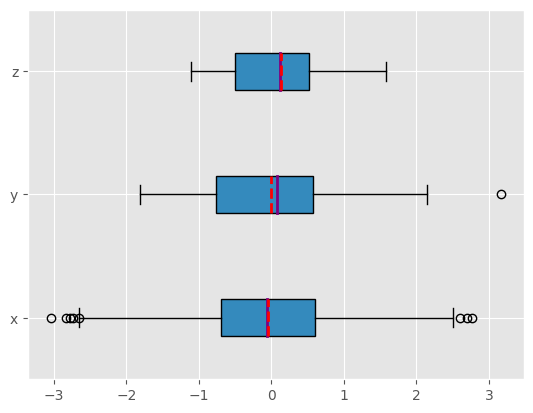

In [201]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
            labels=('x', 'y', 'z'), patch_artist=True,
            medianprops={'linewidth': 2, 'color': 'purple'},
            meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

<p>Some observations about the parameters of <code>.boxplot()</code>:</p>
<ul>
<li><strong>x</strong> - data</li>
<li><strong>vert</strong> - plot orientation. <code>False</code> = horizontal</li>
<li><strong>showmeans</strong> - when set to <code>True</code>, shows the mean of your data</li>
<li><strong>meanline</strong> - when <code>True</code>, represents the mean as a line (default is a point)</li>
<li><strong>labels</strong> - the labels of the data</li>
<li><strong>patch_artist</strong> - determines how to draw the graph</li>
<li><strong>meadianprops</strong> - denotes the properties of the line representing the median</li>
<li><strong>meanprops</strong> - denotes the properties of the line representing the mean</li>
</ul>
<p>Here's what you can see in each of the box plots:</p>
<ul>
<li><strong>Mean</strong> - red dashed line</li>
<li><strong>Median</strong> - purple line</li>
<li><strong>First Quartile</strong> - the left edge of the rectangle</li>
<li><strong>Third Quartile</strong> - the right edge of the rectangle</li>
<li><strong>Interquartile range</strong> - the length of the rectangle</li>
<li><strong>Range</strong> - the whole extension, from left to right</li>
<li><strong>Outliers</strong> - the dots</li>
</ul>
<hr>
<h3><b>6.2 Histograms</b></h2>
<p>When dealing with a dataset containing a large number of unique values, histograms come in handy.</p> 